In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,52.581456,31.515974,12.387935,21.356817,14.310155
1,57.591302,4.986913,12.188466,7.104987,26.504727
2,29.890101,6.102050,12.224348,28.293279,17.852629
3,44.228632,38.238718,8.924340,-14.097181,20.430535
4,53.780644,9.263630,6.062533,21.745472,21.526109


<Axes: ylabel='Density'>

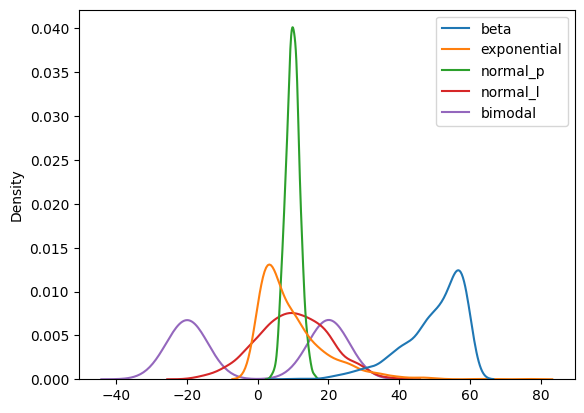

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.752871,9.786477,9.932080,10.052416,0.048770
std,8.752914,9.435023,1.956049,9.953561,20.237994
min,9.947915,0.012654,3.825610,-17.994952,-28.864485
25%,45.271546,2.970456,8.632077,3.309514,-19.976653
50%,51.987610,6.631747,9.930069,10.113614,-0.305738
75%,56.667976,13.715357,11.212889,17.320765,20.264720
max,59.988666,76.118204,16.172419,38.388006,28.341550


<Axes: ylabel='Density'>

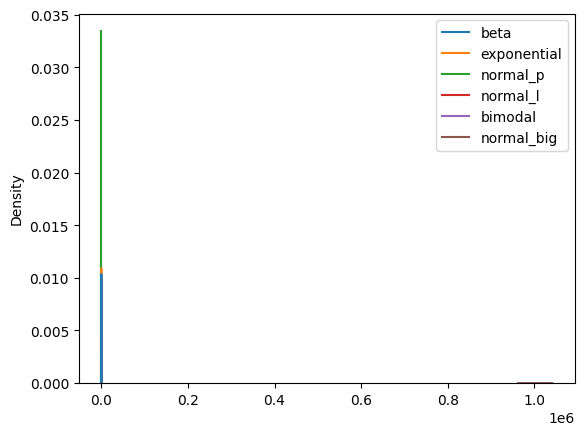

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

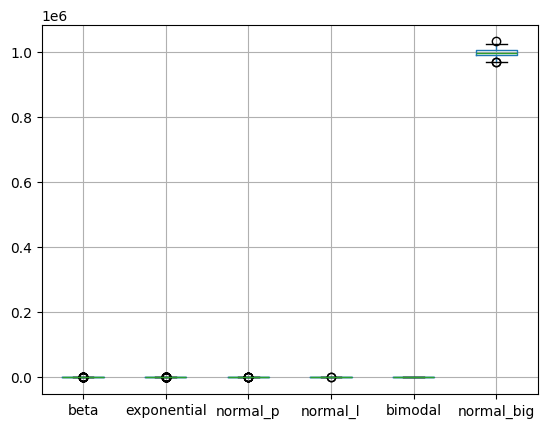

In [8]:
df.boxplot()

In [9]:
scaler = RobustScaler()
df_s = scaler.fit_transform(df)
col_names = list(df.columns)
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.052108,2.315910,0.952362,0.802441,0.363206,-1.026968
1,0.491706,-0.153080,0.875072,-0.214729,0.666241,0.009464
2,-1.938985,-0.049298,0.888976,1.297505,0.451236,-0.198278
3,-0.680825,2.941579,-0.389695,-1.727954,0.515297,0.038985
4,0.157333,0.244942,-1.498573,0.830180,0.542522,-0.141369


<Axes: ylabel='Density'>

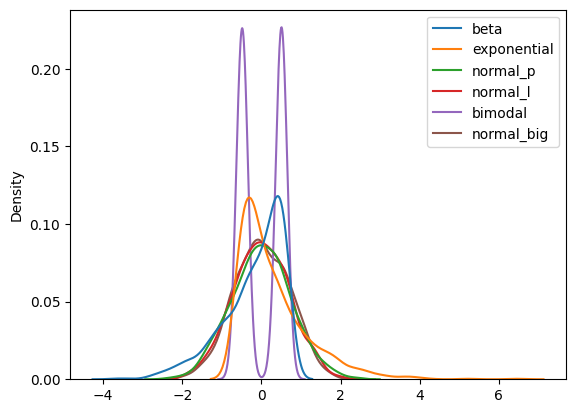

In [10]:
sns.kdeplot(data=df_s)

In [11]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,-0.196091,0.293603,0.000779,-4.367746e-03,0.008810,0.013986
std,0.768040,0.878093,0.757920,7.103978e-01,0.502915,0.694816
min,-3.688848,-0.616022,-2.365325,-2.006143e+00,-0.709686,-1.983190
25%,-0.589313,-0.340747,-0.502939,-4.856169e-01,-0.488823,-0.471351
50%,0.000000,0.000000,0.000000,6.353425e-17,0.000000,0.000000
75%,0.410687,0.659253,0.497061,5.143831e-01,0.511177,0.528649
max,0.702067,6.466924,2.418755,2.017978e+00,0.711886,2.345731


<Axes: >

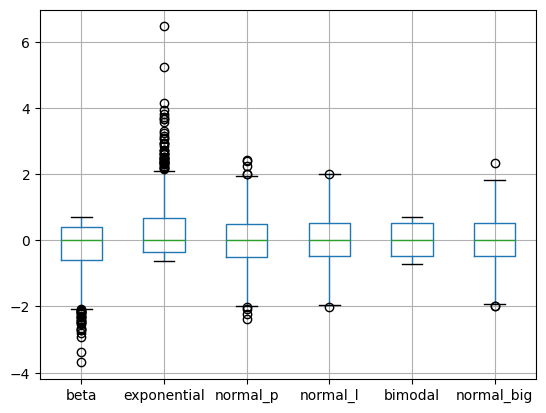

In [12]:
df_s.boxplot()

In [13]:
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.6888475194170094,
 -0.6160218348233948,
 -2.3653249765990187,
 -2.00614261390437,
 -0.7096861969551773,
 -1.9831902534241077]

In [14]:
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7020668688892344,
 6.466924134225859,
 2.418754500565,
 2.0179778012423832,
 0.7118864417591271,
 2.345730828458677]

In [15]:
scaler.center_

array([ 5.19876100e+01,  6.63174705e+00,  9.93006895e+00,  1.01136141e+01,
       -3.05737838e-01,  9.99204567e+05])